Table 4.1 for Rosenbork Function:
RF: m(u) = 10(u2-(u1)^2)^2 + (u1-1)^2

In [68]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [69]:
class RosenbrockOptimizer1:
    def __init__(self, initial_u):
        # Define symbolic variables for u1 and u2
        self.u1, self.u2 = sp.symbols('u1 u2')
        
        # Initialize u with the provided initial values
        self.u = initial_u
        
        # Define the Rosenbrock function
        self.mu = 10 * (self.u2 - self.u1**2)**2 + (self.u1 - 1)**2
        
    def rosenbrock_func(self):
        """Computes the value of the Rosenbrock function."""
        return self.mu.subs({self.u1: self.u[0, 0], self.u2: self.u[1, 0]}).evalf()

    def dmdu(self):
        """Computes the gradient (derivative) of the Rosenbrock function."""
        # Differentiate with respect to u1 and u2
        dmdu1 = sp.diff(self.mu, self.u1)
        dmdu2 = sp.diff(self.mu, self.u2)
        
        # Evaluate the derivatives at the current u values
        dmdu1_val = dmdu1.subs({self.u1: self.u[0, 0], self.u2: self.u[1, 0]}).evalf()
        dmdu2_val = dmdu2.subs({self.u1: self.u[0, 0], self.u2: self.u[1, 0]}).evalf()

        return np.array([[dmdu1_val],[dmdu2_val]])

    def optimize(self, alpha=0.04):
        """Performs optimization using gradient descent on the Rosenbrock function."""
        m_new = self.rosenbrock_func()
        m_old = m_new + 1000  # Initialize m_old to a larger value to enter the loop

        while m_new < m_old:
            m_old = m_new
            h = -1 * self.dmdu()  # Compute the negative gradient
            self.u = self.u + alpha * h  # Update u
            m_new = self.rosenbrock_func()  # Compute the new function value

        return self.u

# Example usage
initial_u = np.array([[-0.8], [0.7]])
optimizer = RosenbrockOptimizer1(initial_u)

# Perform the optimization
optimized_u = optimizer.optimize()

# Print the optimized u
print(f'Optimized u:{optimized_u}')

Optimized u:[[0.828101266806498]
 [0.702170088613397]]


Table 4.2 for Rosenbork Function:
RF: m(u) = 10(u2-(u1)^2)^2 + (u1-1)^2

Number of iterations:4908
Optimized u:[[0.999999999999988]
 [0.999999999999975]]


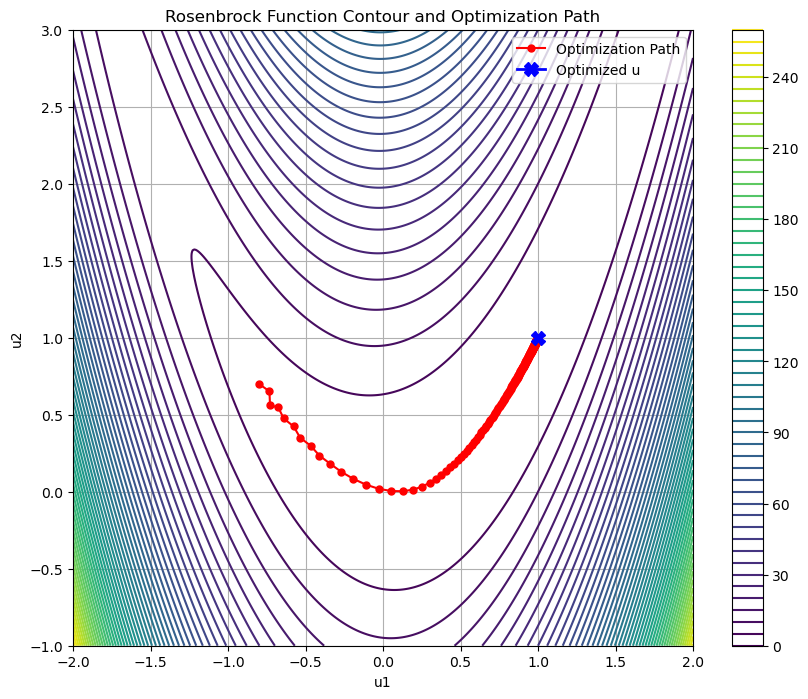

In [70]:
class RosenbrockOptimizer2:
    def __init__(self, initial_u):
        # Define symbolic variables for u1 and u2
        self.u1, self.u2 = sp.symbols('u1 u2')
        
        # Initialize u with the provided initial values
        self.u = initial_u
        
        # Define the Rosenbrock function
        self.mu = 10 * (self.u2 - self.u1**2)**2 + (self.u1 - 1)**2
        
    def rosenbrock_func(self, u=None):
        """Computes the value of the Rosenbrock function."""
        if u is None:
            u = self.u  # Use the current u if no argument is provided
        return self.mu.subs({self.u1: u[0, 0], self.u2: u[1, 0]}).evalf()

    def dmdu(self):
        """Computes the gradient (derivative) of the Rosenbrock function."""
        # Differentiate with respect to u1 and u2
        dmdu1 = sp.diff(self.mu, self.u1)
        dmdu2 = sp.diff(self.mu, self.u2)
        
        dmdu1_val = dmdu1.subs({self.u1: self.u[0, 0], self.u2: self.u[1, 0]}).evalf()
        dmdu2_val = dmdu2.subs({self.u1: self.u[0, 0], self.u2: self.u[1, 0]}).evalf()
       
        # Evaluate the derivatives at the current u values
        return np.array([[dmdu1_val],[dmdu2_val]])
    
    def optimize(self, alpha_old=0.04, c=0.5, r=0.5):
        """Performs optimization using gradient descent on the Rosenbrock function with backtracking."""
        m_new = self.rosenbrock_func()  # Current function value
        m_old = m_new + 1000  # Initialize m_old to a larger value to enter the loop
        i = 0  # Iteration counter
        
        # Store the path for plotting
        path = [self.u.flatten()]  # Store initial position

        while m_new < m_old:
            m_old = m_new
            f = self.dmdu()  # Compute the gradient
            h = -1 * f  # Steepest descent direction

            alpha_new = alpha_old / r
            m_x = m_new + 1000  # Initialize m_x to a larger value

            # Backtracking line search
            while m_x > m_new + (c * alpha_new * h.T @ f):
                alpha_new = r * alpha_new
                u_x = self.u + alpha_new * h  # Update u using new step size
                m_x = self.rosenbrock_func(u_x)  # Compute the new function value
                i += 1  # Increment iteration counter

            self.u = u_x  # Update the current u with the new values
            m_new = m_x  # Update the current function value

            # Store the path for plotting
            path.append(self.u.flatten())

        return self.u, i, np.array(path)  # Return the optimized u, number of iterations, and path

    def plot_rosenbrock_2d(self, path):
        """Plots the Rosenbrock function and the optimization path in 2D."""
        # Create a grid of values for u1 and u2
        u1_vals = np.linspace(-2, 2, 400)
        u2_vals = np.linspace(-1, 3, 400)
        U1, U2 = np.meshgrid(u1_vals, u2_vals)

        # Compute Rosenbrock function values for the grid
        Z = 10 * (U2 - U1**2)**2 + (U1 - 1)**2

        # Create a 2D contour plot
        plt.figure(figsize=(10, 8))
        contour = plt.contour(U1, U2, Z, levels=60, cmap='viridis')
        plt.colorbar(contour)

        # Plot the optimization path
        path_x = path[:, 0]
        path_y = path[:, 1]
        plt.plot(path_x, path_y, color='red', marker='o', markersize=5, label='Optimization Path')

        # Highlight the optimized u
        plt.plot(path[-1][0], path[-1][1], color='blue', marker='X', markersize=10, label='Optimized u', linewidth=2)

        # Labels and title
        plt.xlabel('u1')
        plt.ylabel('u2')
        plt.title('Rosenbrock Function Contour and Optimization Path')
        plt.legend()
        plt.grid()
        plt.show()

# Example usage
initial_u = np.array([[-0.8], [0.7]])
optimizer = RosenbrockOptimizer2(initial_u)

# Perform the optimization
optimized_u, iterations, path = optimizer.optimize()

# Print the optimized u and the number of iterations
print(f'Number of iterations:{iterations}')
print(f'Optimized u:{optimized_u}')

# Plot the Rosenbrock function and optimization path
optimizer.plot_rosenbrock_2d(path)


Table 4.3 for Rosenbork Function:
RF: m(u) = 10(u2-(u1)^2)^2 + (u1-1)^2

Optimized Function Value:2.5297783154306322e-28
Optimized u:[[1.]
 [1.]]


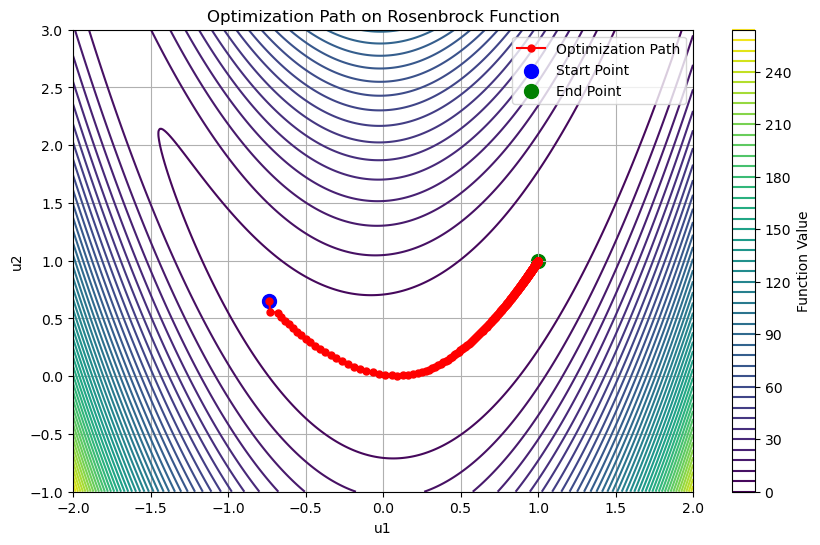

In [71]:
class ConjugateGradientOptimizer:
    def __init__(self, u_init, alpha_init, c, r, nreset):
        # Initialize parameters
        self.u = u_init  # Initial point
        self.alpha_init = alpha_init  # Initial step size
        self.c = c  # Parameter for backtracking
        self.r = r  # Reduction factor for step size
        self.nreset = nreset  # Reset frequency

        # Define symbolic variables for the Rosenbrock function
        self.u1, self.u2 = sp.symbols('u1 u2')
        self.symbolic_function = 10 * (self.u2 - self.u1**2)**2 + (self.u1 - 1)**2
        
        # Compute symbolic gradients
        self.symbolic_gradient = [sp.diff(self.symbolic_function, var) for var in (self.u1, self.u2)]
        self.simplified_gradient = [sp.simplify(grad) for grad in self.symbolic_gradient]  # Simplify gradients

        # Initialize optimization variables
        self.m_new = self.objective_function(self.u)  # Current function value
        self.m_old = np.inf  # Previous function value
        self.f_new = None  # Gradient at current point
        self.h_new = None  # Search direction
        self.cnt = 0  # Counter for reset
        self.path = []  # Store path for visualization

    def objective_function(self, u):
        # Evaluate the Rosenbrock function using symbolic representation
        return float(self.symbolic_function.subs({self.u1: u[0, 0], self.u2: u[1, 0]}))

    def gradient(self, u):
        # Compute the gradient of the objective function symbolically
        u1_val = u[0, 0]
        u2_val = u[1, 0]
        grad_u1 = float(self.simplified_gradient[0].subs({self.u1: u1_val, self.u2: u2_val}))
        grad_u2 = float(self.simplified_gradient[1].subs({self.u1: u1_val, self.u2: u2_val}))
        return np.array([[grad_u1], [grad_u2]])

    def optimize(self):
        alpha = self.alpha_init  # Current step size
        while self.m_new < self.m_old:  # Optimization loop
            self.m_old = self.m_new
            self.f_new = self.gradient(self.u)  # Compute gradient
            h_new = -self.f_new  # Initial search direction

            # Update the search direction based on reset condition
            if self.cnt % self.nreset == 0:
                h_new = -self.f_new  # Reset direction
            else:
                beta = self.compute_beta()
                h_new = -self.f_new + max(0, beta) * self.h_new
            
            # Backtracking line search
            alpha = alpha / self.r  # Initial step size
            m_x = np.inf  # Dummy value for comparison
            while m_x > self.m_new + self.c * alpha * h_new.T @ self.f_new:
                alpha *= self.r  # Decrease step size
                u_x = self.u + alpha * h_new  # New candidate point
                m_x = self.objective_function(u_x)  # Evaluate function at new point

            self.m_new = m_x  # Update current function value
            self.u = u_x  # Update current point
            self.path.append(self.u.flatten())  # Store the path
            self.h_new = h_new  # Update direction
            self.cnt += 1  # Increment counter

        return self.m_old, self.u  # Return the optimized function value and point

    def compute_beta(self):
        # Placeholder for beta computation, could be implemented as needed
        return 0  # Example value

    def plot_optimization_path(self):
        # Prepare grid for contour plot
        x = np.linspace(-2, 2, 400)
        y = np.linspace(-1, 3, 400)
        X, Y = np.meshgrid(x, y)
        Z = 10 * (Y - X ** 2) ** 2 + (X - 1) ** 2  # Rosenbrock function values

        plt.figure(figsize=(10, 6))
        plt.contour(X, Y, Z, levels=50, cmap='viridis')
        plt.colorbar(label='Function Value')
        plt.plot(*zip(*self.path), marker='o', color='red', markersize=5, label='Optimization Path')
        plt.scatter(self.path[0][0], self.path[0][1], color='blue', label='Start Point', s=100)
        plt.scatter(self.path[-1][0], self.path[-1][1], color='green', label='End Point', s=100)
        plt.title('Optimization Path on Rosenbrock Function')
        plt.xlabel('u1')
        plt.ylabel('u2')
        plt.legend()
        plt.grid()
        plt.show()

# Example usage
if __name__ == "__main__":
    u_init = np.array([[-0.8], [0.7]])  # Initial point
    alpha_init = 0.04  # Initial step size
    c = 0.5  # Parameter for backtracking
    r = 0.5  # Reduction factor for step size
    nreset = 5  # Reset frequency

    optimizer = ConjugateGradientOptimizer(u_init, alpha_init, c, r, nreset)
    optimal_value, optimal_point = optimizer.optimize()

    print(f'Optimized Function Value:{optimal_value}')
    print(f'Optimized u:{optimal_point}')

    # Plot the optimization path
    optimizer.plot_optimization_path()

Newton's Method 5.1

Optimized Point: [[1.]
 [1.]]
Number of Iterations: 6


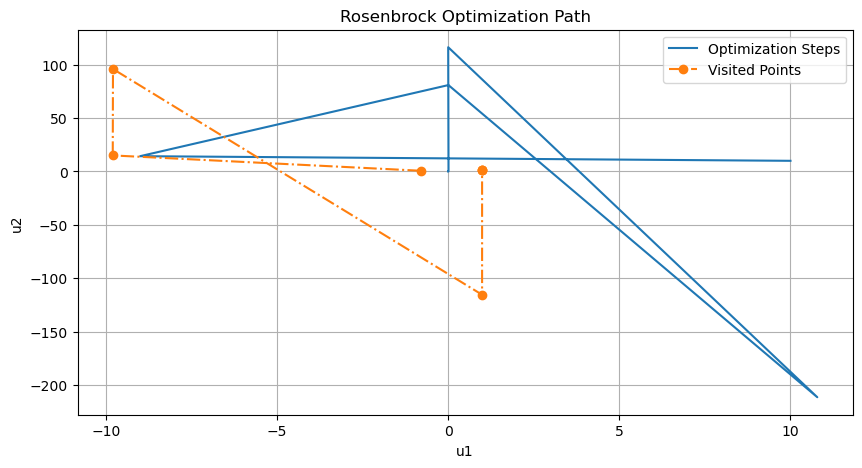

In [72]:
class RosenbrockOptimizer3:
    def __init__(self):
        # Define symbolic variables
        self.u1, self.u2 = sp.symbols('u1 u2')

        # Define the Rosenbrock function symbolically
        self.m_u = 10 * (self.u2 - self.u1**2)**2 + (self.u1 - 1)**2

        # Compute gradient and Hessian symbolically
        self.gradient = [sp.diff(self.m_u, var) for var in (self.u1, self.u2)]
        self.hessian = sp.Matrix([[sp.diff(self.gradient[0], self.u1), sp.diff(self.gradient[0], self.u2)],
                                   [sp.diff(self.gradient[1], self.u1), sp.diff(self.gradient[1], self.u2)]])

    def rosenbrock_func(self, u):
        """Evaluate the Rosenbrock function at a given point u."""
        return float(self.m_u.subs({self.u1: u[0, 0], self.u2: u[1, 0]}))

    def dmdu(self, u):
        """Compute the gradient of the Rosenbrock function at point u."""
        return np.array([[float(g.subs({self.u1: u[0, 0], self.u2: u[1, 0]})) for g in self.gradient]])

    def dmdu_2(self, u):
        """Compute the Hessian matrix of the Rosenbrock function at point u."""
        return np.array(self.hessian.subs({self.u1: u[0, 0], self.u2: u[1, 0]})).astype(float)

    def optimize(self, u_init, tresh=0.0001, max_iter=100):
        """Optimize the Rosenbrock function using Newton's method."""
        u = u_init.copy()
        tresh_n = tresh + 100  # Initial threshold
        cnt = 0  # Iteration counter

        # Initialize path arrays for tracking optimization
        path = np.array([[u[0, 0], u[1, 0]]])  # Store initial point
        path_tresh = np.array([tresh_n])
        path_h = np.array([[10], [10]])  # Initial arbitrary step

        # Optimization loop
        while tresh_n > tresh and cnt < max_iter:
            f = self.dmdu(u)  # Compute gradient
            K = self.dmdu_2(u)  # Compute Hessian
            h = np.linalg.inv(K) @ (-1 * f.T)  # Compute step
            u = u + h  # Update the current point
            f = self.dmdu(u)  # Update gradient
            tresh_n = np.sqrt(f @ f.T)[0, 0]  # Update threshold as scalar

            # Update path arrays
            path = np.vstack((path, [u[0, 0], u[1, 0]]))  # Store current position
            path_tresh = np.append(path_tresh, tresh_n)  # Store current threshold
            path_h = np.hstack((path_h, h))  # Store the step

            cnt += 1  # Increment the iteration counter

        return u, cnt, path, path_h

    def plot_results(self, path, path_h):
        """Plot the optimization results."""
        plt.figure(figsize=(10, 5))
        plt.plot(path_h[0, :], path_h[1, :], '-', label='Optimization Steps')
        plt.plot(path[:, 0], path[:, 1], 'o', linestyle='dashdot', label='Visited Points')
        plt.xlabel('u1')
        plt.ylabel('u2')
        plt.title('Rosenbrock Optimization Path')
        plt.legend()
        plt.grid()
        plt.show()


# Example usage
if __name__ == "__main__":
    optimizer = RosenbrockOptimizer3()
    
    # Initialize the starting point
    u_init = np.array([[-0.8], [0.7]])
    
    # Run the optimization
    optimal_point, iterations, path, path_h = optimizer.optimize(u_init)

    # Print results
    print("Optimized Point:", optimal_point)
    print("Number of Iterations:", iterations)

    # Plot the results
    optimizer.plot_results(path, path_h)